<a href="https://colab.research.google.com/github/Ilham-0104/Machine_Learning_Data_Science/blob/main/Bag_4_pandas_Regression_Insurance_ilham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
df = pd.read_csv("/content/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='smoker', ylabel='charges'>

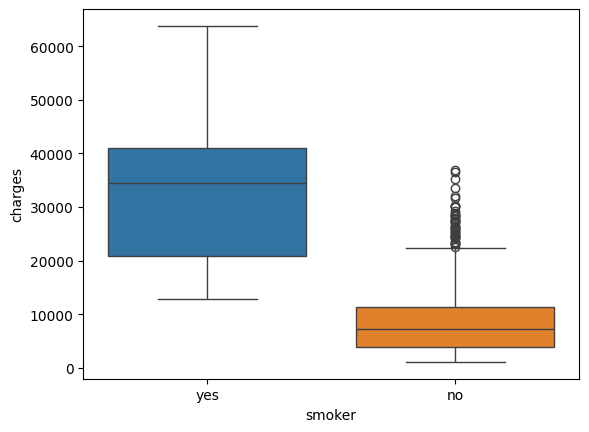

In [ ]:
sns.boxplot(x="smoker",
            y="charges",
            data = df,
            hue="smoker")

# orang yang merokok dikenakan harga polis insurance lebih tinggi

In [ ]:
import plotly.express as px
px.box(df,x = "charges")

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df = df[(df["charges"] < 34400)]

# pilih features untuk buat ML
df = df[["age", "bmi", "children", "smoker", "charges"]]
df.shape

(1197, 5)

In [ ]:
a = 3
b = 4
c = (a**2 + b**2)**0.5
print(c)

# Function : potongan code yang bisa dipanggil atau dipakai berkali-kali
def pythagoras(a, b):
    c = (a**2 + b**2) ** 0.5
    return round(c, 2)

pythagoras(13,17)

5.0


21.4

In [ ]:
pythagoras(24, 28)

36.88

In [ ]:
pythagoras(55, 88)

103.77

In [ ]:
def smoking(state):
    if state == "yes":
        return 1
    return 0

df["smoking"] = df["smoker"].apply(smoking)
df.head()

,age,bmi,children,smoker,charges,smoking
0,19,27.900,0,yes,16884.92400,1
1,18,33.770,1,no,1725.55230,0
2,28,33.000,3,no,4449.46200,0
3,33,22.705,0,no,21984.47061,0
4,32,28.880,0,no,3866.85520,0


In [ ]:
# Drop column smoker
df.drop(columns=["smoker"], inplace = True) # inplace true untuk save condition dataframe untuk hilangin kolom smoker

In [ ]:
df.head()

,age,bmi,children,charges,smoking
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


In [ ]:
# Split data features dan target
X = df[["age", "bmi", "children", "smoking"]].values
y = df[["charges"]].values

In [ ]:
X

array([[19.  , 27.9 ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  ,  0.  ],
       [28.  , 33.  ,  3.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  ,  0.  ],
       [21.  , 25.8 ,  0.  ,  0.  ],
       [61.  , 29.07,  0.  ,  1.  ]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression #Linear Regression / Multiple Linear Regression(kolom features lebih dari 1)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
# Object untuk Machine Learning dari setiap library
LR = LinearRegression()
DT = DecisionTreeRegressor()
RF = RandomForestRegressor()
SVM = SVR()

In [ ]:
def train_model(ai, X_train, X_test, y_train, y_test):
    ai.fit(X_train, y_train)
    return ai.predict(X_test)

In [ ]:
list_model = [LR, DT, RF, SVM]
list_nama = ["Linear Regression", "Decision Tree", "Random Forest", "SVM"]

In [ ]:
list_pred = []
for agent in list_model:
    print(agent)
    prediksi = train_model(agent, X_train, X_test, y_train, y_test)
    list_pred.append(prediksi)

LinearRegression()
DecisionTreeRegressor()
RandomForestRegressor()


<ipython-input-46-8bda9ccc9082>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



SVR()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# MAPE
for i, prediksi in enumerate(list_pred):
    print(list_nama[i], round(mean_absolute_percentage_error(y_test, prediksi), 2))

Linear Regression 0.29
Decision Tree 0.48
Random Forest 0.35
SVM 0.88


In [ ]:
list_pred

[array([[ 3007.5426388 ],
        [10513.05719037],
        [20575.02698277],
        [18007.74085043],
        [20894.45882476],
        [ 5587.34475188],
        [ 6528.32646954],
        [ 6388.22765713],
        [23485.07475752],
        [ 6300.12710856],
        [ 8899.16641792],
        [ 8983.85657674],
        [ 9639.12515781],
        [11682.78319362],
        [10557.4636379 ],
        [ 3922.15349063],
        [ 3585.47193445],
        [13949.06178059],
        [ 3105.28347998],
        [ 9775.68136912],
        [ 5378.20468305],
        [12063.97966962],
        [19755.82620858],
        [19868.4921342 ],
        [17742.93997289],
        [10442.42355983],
        [12458.02722939],
        [ 8451.80002518],
        [ 5865.31395167],
        [28456.04050524],
        [ 8722.09267543],
        [ 4210.52715609],
        [20964.00669528],
        [14067.74270907],
        [ 8036.33458147],
        [ 6390.64315389],
        [ 8531.8330054 ],
        [ 9583.60598733],
        [ 31

In [ ]:
# Buatlah sebuah function untuk menghitung Body Mass Index/ BMI kemudian munculkan kategorinya
# dengan menerima parameter tinggi badan dalam satuan Meter dan berat dalam Kg

# https://www.siloamhospitals.com/informasi-siloam/artikel/cara-menghitung-bmi
# pakai yang pengukuran metrik

# Kategori
# Kurang dari 18,5 berarti berat badan kurang (underweight).
# Antara 18,5 - 24,9 berarti berat badan normal
# Antara 25-29,9 berarti berat badan berlebih (overweight).
# Di atas 30 berarti obesitas

In [ ]:
def bmi(tinggi, berat):
    result = berat / tinggi ** 2

    if result < 18.5:
        categori = "Underweight"
    elif result >= 18.5 and result <= 24.9:
        categori = "Normal"
    elif result >= 25 and result <= 29.9:
        categori = "Overweight"
    elif result >= 30:
        categori = "Obesitas"

    return [result, categori]

bmi(1.7, 70)

[24.221453287197235, 'Normal']

In [ ]:
# buatlah sebuah function untuk mengubah angka (0-1) menjadi gender
# misalkan namanya converter (0) akan menjadu wanita dan converter(1) -> menjadi pria
# Selain itu hasilnya akan menjadi "Not Defined"

In [ ]:
def jenis_kelamin (nomor):
    if nomor == 0:
        return "Wanita"
    elif nomor == 1:
        return "Pria"
    elif nomor == 2:
        return "banci"
    else:
        return "Not Defined"

jenis_kelamin(2)

'banci'